In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import math
import controls as ctrl
import pandas as pd

# Defining our endowments

In [2]:
original_task_endowments = ctrl.task_endowments
unique_task_endowments = list(set(ctrl.task_endowments))
unique_task_endowments.sort()
unique_task_endowments

[9, 15, 25, 40, 80, 125]

# Defining our tax rates

In [3]:
tax_rates = []
for i in range(0,12, 2):
    tax_rates.append(i/10)
tax_rates

[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]

# Calculating Public Incomes and Private Productivities

## Calculating Public Contributions

In [4]:
total_public_contributions = []

for tax_rate in tax_rates:
    current_public_contribution = 0 # public contrib for current tax rate
    
    for endowment in original_task_endowments:
        current_public_contribution += tax_rate*endowment # calculating public contrib for current tax rate
        
    total_public_contributions.append(current_public_contribution) # storing current public contrib
    
total_public_contributions

[0.0, 69.8, 139.6, 209.4, 279.2, 349.0]

## Processing Public Incomes and Private Productivities

In [5]:
public_incomes = []
private_productivities = []

for total_public_contribution in total_public_contributions:
    
    if total_public_contribution <= 192:
        # public income for current total contribution
        public_incomes.append(101 / (1 + 100 * math.exp(-0.025 * total_public_contribution)) - 1)
        # private productivity for current total contribution
        private_productivities.append(ctrl.alpha + ctrl.beta*total_public_contribution)
    else:
        public_incomes.append(101 / (1 + 100 * math.exp(-0.025 * 192)) - 1)
        private_productivities.append(ctrl.alpha + ctrl.beta*192)

In [6]:
public_incomes

[0.0,
 4.469956188096408,
 23.937734568535316,
 54.40395032822436,
 54.40395032822436,
 54.40395032822436]

In [7]:
private_productivities

[5.0, 9.3625, 13.725, 17.0, 17.0, 17.0]

# Calculating Private Incomes

In [8]:
private_incomes = {}

for task_endowment in unique_task_endowments:
    index = 0 # index for calling the private productivity that corresponds to an specific tax rate
    
    private_incomes[f"private_incomes_{task_endowment}"] = [] # list with all the private incomes for a player
    
    for tax_rate in tax_rates: # calculating all the private incomes for an specific player
        private_incomes[f"private_incomes_{task_endowment}"].append(round(task_endowment*(1-tax_rate)*private_productivities[index], 3))
        index += 1

In [9]:
private_incomes

{'private_incomes_9': [45.0, 67.41, 74.115, 61.2, 30.6, 0.0],
 'private_incomes_15': [75.0, 112.35, 123.525, 102.0, 51.0, 0.0],
 'private_incomes_25': [125.0, 187.25, 205.875, 170.0, 85.0, 0.0],
 'private_incomes_40': [200.0, 299.6, 329.4, 272.0, 136.0, 0.0],
 'private_incomes_80': [400.0, 599.2, 658.8, 544.0, 272.0, 0.0],
 'private_incomes_125': [625.0, 936.25, 1029.375, 850.0, 425.0, 0.0]}

# Obtaining Final Payoffs

In [10]:
final_payoffs = {}

for task_endowment in unique_task_endowments:
    index = 0 # index for calling the private income/public contrib that corresponds to an specific tax rate
    
    final_payoffs[f"final_payoff_{task_endowment}"] = [] # list with all the final_payoffs for a player
    
    for tax_rate in tax_rates: # calculating all the final payoffs for an specific player
        final_payoffs[f"final_payoff_{task_endowment}"].append(round(private_incomes[f"private_incomes_{task_endowment}"][index] 
                                                              +public_incomes[index], 3))
        index += 1

In [11]:
final_payoffs

{'final_payoff_9': [45.0, 71.88, 98.053, 115.604, 85.004, 54.404],
 'final_payoff_15': [75.0, 116.82, 147.463, 156.404, 105.404, 54.404],
 'final_payoff_25': [125.0, 191.72, 229.813, 224.404, 139.404, 54.404],
 'final_payoff_40': [200.0, 304.07, 353.338, 326.404, 190.404, 54.404],
 'final_payoff_80': [400.0, 603.67, 682.738, 598.404, 326.404, 54.404],
 'final_payoff_125': [625.0, 940.72, 1053.313, 904.404, 479.404, 54.404]}

# Creating our payoff table

In [12]:
payoffs_db = pd.DataFrame.from_dict(final_payoffs, orient='index')
payoffs_db.to_excel("payoffs_table.xlsx")

D:\Anaconda5.2.0\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '0.9.8' or newer of 'xlsxwriter' (version '0.9.3' currently installed).
  warnings.warn(msg, UserWarning)


# Creating our subplots

<IPython.core.display.Javascript object>


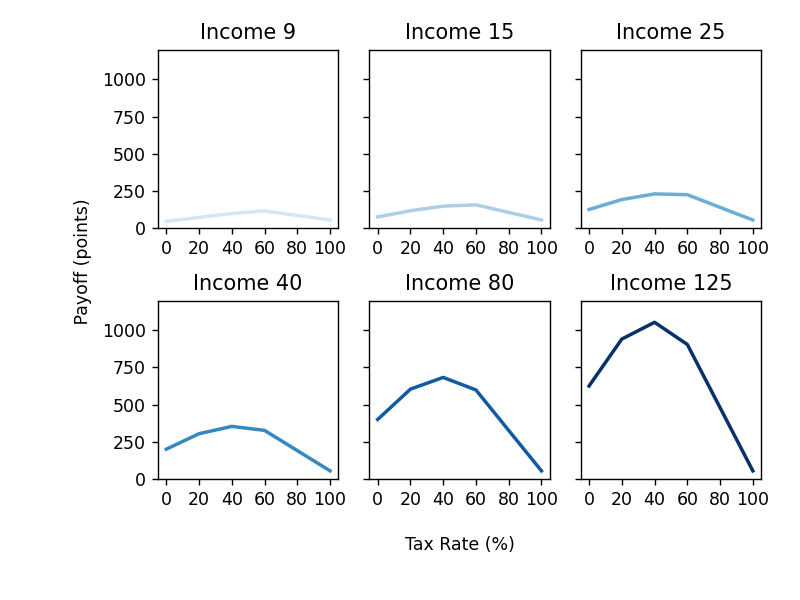

In [22]:
from matplotlib.figure import Figure

# creating a set of subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=False, sharey=True)

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)

axs = [ax1,ax2,ax3,ax4,ax5,ax6] # storing a subplot for each progressivity level

c = np.arange(1, len(axs) + 2) # defining a scale for barchat colormap
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max()) # normalizing our scale
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues) # creating a shades of blue colormap
cmap.set_array([])

# plotting all subplots
for n_axis in range(1, len(axs) + 1):
    task_endowment = unique_task_endowments[n_axis-1]
    xvals = [tax_rate*100 for tax_rate in tax_rates] # calling our tax rates for a progressivity level
    
    axs[n_axis-1].plot(xvals, final_payoffs[f"final_payoff_{task_endowment}"], linewidth = 2, color=cmap.to_rgba(n_axis+1))
    
    axs[n_axis-1].set_ylim(0, 1200) # setting the y axis limit from 0% to 100%
    axs[n_axis-1].set_title(f"Income {task_endowment}") # setting the title of each subplot as to their respective level

# hiding big subplot tick and tick label of the big axes
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.tight_layout(pad=1.0)

# stablishing the x and y titles
plt.xlabel("Tax Rate (%)")
plt.tick_params(axis='x', which='major', pad=15) # spacing between x-axis ticks and name
plt.ylabel(" Payoff (points)")
plt.tick_params(axis='y', which='major', pad=15) # spacing between y-axis ticks and name
#plt.title("Possible Incomes without messaging")

# # setting up the progressivity plots
plt.setp(axs, xticks=[tax_rate*100 for tax_rate in tax_rates], xticklabels=[round(tax_rate*100) for tax_rate in tax_rates]) 

fig.tight_layout(pad=1.0) # adding some spacing between subplots
fig.savefig('Income Plots.png')